In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import json

wali_arch_syscalls

In [8]:
num_x86_calls = 608 - 247 + 1

undef_calls = {
    "aarch64": 56,
    "rv64": 57
}

unique_calls = {
    "aarch64": 0,
    "rv64": 2
}

archs = ["aarch64", "rv64"]

syscall_archs = {
    "x86_64": {
        "common": num_x86_calls,
        "mirror": 0,
        "unique": 0
    }
}

for arch in archs:
    syscall_archs[arch] = {
        "common": num_x86_calls - undef_calls[arch],
        "mirror": undef_calls[arch],
        "unique": unique_calls[arch]
    }
print(syscall_archs)

{'x86_64': {'common': 362, 'mirror': 0, 'unique': 0}, 'aarch64': {'common': 306, 'mirror': 56, 'unique': 0}, 'rv64': {'common': 305, 'mirror': 57, 'unique': 2}}


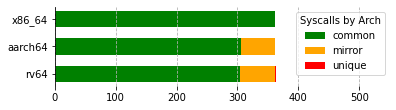

In [95]:
fig, ax = plt.subplots()
fig.set_figheight(1.5)

keys = list(syscall_archs.keys())[::-1]
common_vals = [x["common"] for x in syscall_archs.values()][::-1]
mirror_vals = [x["mirror"] for x in syscall_archs.values()][::-1]
unique_vals = [x["unique"] for x in syscall_archs.values()][::-1]
cm_vals = [mirror_vals[i] + common_vals[i] for i in range(len(common_vals))]


colors = ["green", "orange", "red"]
labels = ["common", "mirror", "unique"]
lefts = [0, 0, 0]
b = []
for bars, col, label in zip([common_vals, mirror_vals, unique_vals], colors, labels):
    b = ax.barh(keys, bars, left=lefts, color=col, height=0.6, label=label)
    lefts = [lefts[i] + bars[i] for i in range(len(common_vals))]

ax.set_xlim(right=550)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(linestyle='dashed')
ax.legend(title="Syscalls by Arch", loc="upper right")

In [99]:
fig.savefig("figures/syscall_archs", dpi=600, bbox_inches='tight')